In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy

import statsmodels.api as sm

In [2]:
tickers = ["BTCUSDT","ETHUSDT","BNBUSDT","LTCUSDT","XMRUSDT"]

In [3]:
engine = sqlalchemy.create_engine('sqlite:///new.db')

In [47]:
engine_out = sqlalchemy.create_engine('sqlite:///close_only.db')

In [39]:
all_tickers = engine.table_names()

C:\Users\Titouan\AppData\Local\Temp/ipykernel_12540/952545624.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tickers = engine.table_names()


In [41]:
dic_df ={}
for ticker in all_tickers : 
    dic_df[ticker] = pd.read_sql(ticker,engine)
    dic_df[ticker].set_index("open_time",inplace = True)
    print(ticker)
  
print("loaded")
price_df = dic_df['BTCUSDT'][['close']]
for ticker in all_tickers : 
    price_df = price_df.join(dic_df[ticker]["close"],rsuffix = f"_{ticker}")
    print(ticker)
price_df.drop('close',axis = 1,inplace = True)
#price_df.fillna(0,inplace = True)
# price_df.to_csv("../data/initial_pairs.csv")





AAVEUSDT
AUTOUSDT
BCHUSDT
BETHUSDT
BIFIUSDT
BNBUSDT
BTCUSDT
ETHUSDT
GMXUSDT
GNOUSDT
ILVUSDT
KP3RUSDT
LTCUSDT
MKRUSDT
PAXGUSDT
QNTUSDT
QUICKUSDT
XMRUSDT
YFIIUSDT
YFIUSDT
loaded
AAVEUSDT
AUTOUSDT
BCHUSDT
BETHUSDT
BIFIUSDT
BNBUSDT
BTCUSDT
ETHUSDT
GMXUSDT
GNOUSDT
ILVUSDT
KP3RUSDT
LTCUSDT
MKRUSDT
PAXGUSDT
QNTUSDT
QUICKUSDT
XMRUSDT
YFIIUSDT
YFIUSDT


In [42]:
price_df.head()

,close_AAVEUSDT,close_AUTOUSDT,close_BCHUSDT,close_BETHUSDT,close_BIFIUSDT,close_BNBUSDT,close_BTCUSDT,close_ETHUSDT,close_GMXUSDT,close_GNOUSDT,close_ILVUSDT,close_KP3RUSDT,close_LTCUSDT,close_MKRUSDT,close_PAXGUSDT,close_QNTUSDT,close_QUICKUSDT,close_XMRUSDT,close_YFIIUSDT,close_YFIUSDT
open_time,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,301.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:01:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,301.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:02:00,NaN,NaN,NaN,NaN,NaN,NaN,4280.56,300.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:03:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,300.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:04:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,301.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
price_df_5m = price_df.resample("5T").agg('first') 
price_df_15m = price_df.resample("15T").agg('first')
price_df_60m = price_df.resample("60T").agg('first') 

In [45]:
price_df_60m

,close_AAVEUSDT,close_AUTOUSDT,close_BCHUSDT,close_BETHUSDT,close_BIFIUSDT,close_BNBUSDT,close_BTCUSDT,close_ETHUSDT,close_GMXUSDT,close_GNOUSDT,close_ILVUSDT,close_KP3RUSDT,close_LTCUSDT,close_MKRUSDT,close_PAXGUSDT,close_QNTUSDT,close_QUICKUSDT,close_XMRUSDT,close_YFIIUSDT,close_YFIUSDT
open_time,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4261.48,301.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4308.83,301.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4315.32,302.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4324.35,302.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4349.99,307.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 20:00:00,73.2,224.3,124.2,1806.21,500.4,316.6,28438.81,1827.27,76.24,113.3,60.23,83.51,89.71,688.0,1977.0,124.8,87.9,157.4,1108.5,8705.0
2023-03-31 21:00:00,73.1,225.1,123.5,1798.25,496.6,315.6,28405.69,1818.80,76.08,113.3,59.89,83.22,89.66,685.0,1972.0,124.6,87.8,157.2,1106.5,8722.0
2023-03-31 22:00:00,73.9,225.2,123.8,1804.92,497.7,316.4,28466.19,1823.85,76.06,113.6,59.85,83.33,89.87,690.0,1977.0,125.3,88.9,157.8,1103.3,8783.0


In [48]:
price_df.to_sql("ALL",engine_out)
price_df_5m.to_sql("ALL_5",engine_out)
price_df_15m.to_sql("ALL_15",engine_out)
price_df_60m.to_sql("ALL_60",engine_out)

49269

In [5]:
price_df = pd.read_csv("../data/initial_pairs.csv")
price_df.set_index('open_time',inplace = True)
price_df.head()

,close_BTCUSDT,close_ETHUSDT,close_BNBUSDT,close_LTCUSDT,close_XMRUSDT
open_time,,,,,
2017-08-17 04:00:00,4261.48,301.13,NaN,NaN,NaN
2017-08-17 04:01:00,4261.48,301.13,NaN,NaN,NaN
2017-08-17 04:02:00,4280.56,300.00,NaN,NaN,NaN
2017-08-17 04:03:00,4261.48,300.00,NaN,NaN,NaN
2017-08-17 04:04:00,4261.48,301.13,NaN,NaN,NaN


<AxesSubplot:xlabel='open_time'>

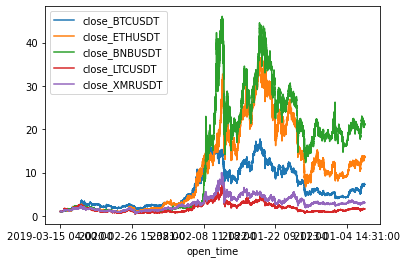

In [6]:
price_df_norm = price_df.dropna().copy()
for c in price_df_norm.columns : 
    price_df_norm[c] = price_df_norm[c] / price_df_norm[c].iloc[0]

price_df_norm.plot()

In [7]:
## First we want to check the Stability

In [8]:
diff_df = price_df.diff()

In [9]:
# diff_df.plot()

In [10]:
import statsmodels.tsa as smt

In [11]:
# smt.stattools.adfuller(np.array(price_df['close_BTCUSDT'].iloc[:100000].values,dtype = 'float16'))

In [12]:
adf_name = ["adf","pvalue","usedlag","nobs","critical values","icbest"]

In [13]:
a = pd.DataFrame([(-1.9838005801314476,
 0.29372083638551827,
 93,
 499906,
 {'1%': -3.430363081126409,
  '5%': -2.8615457817039,
  '10%': -2.5667730773897874},
 4426570.759123392)],columns = adf_name,index = ['btc'])

In [14]:
# adf_df = pd.DataFrame(columns = adf_name)
# for ticker in tickers :
#     ans = smt.stattools.adfuller(np.array(price_df[f'close_{ticker}'].dropna().iloc[:100000].values,dtype = 'float16'))
#     ans_df = pd.DataFrame([ans],columns = adf_name,index= [f"{ticker}"])
#     adf_df = pd.concat([adf_df,ans_df],axis = 0)

In [15]:
# adf_df_delta = pd.DataFrame(columns = adf_name)
# for ticker in tickers :
#     ans = smt.stattools.adfuller(np.array(diff_df[f'close_{ticker}'].dropna().iloc[:100000].values,dtype = 'float16'))
#     ans_df = pd.DataFrame([ans],columns = adf_name,index= [f"Delta_{ticker}"])
#     adf_df_delta = pd.concat([adf_df_delta,ans_df],axis = 0)

In [16]:
# adf_df_delta

# Construction de la regression

In [17]:
reg_df = price_df.dropna()

In [18]:
endog = reg_df['close_BTCUSDT']
exog = reg_df.drop('close_BTCUSDT',axis = 1)


In [19]:
model = sm.OLS(endog= endog,exog = exog,)

In [20]:
model_calibrated = model.fit()

In [21]:
model_calibrated.params

close_ETHUSDT     9.894882
close_BNBUSDT   -20.498868
close_LTCUSDT    78.934890
close_XMRUSDT    47.979978
dtype: float64

In [22]:
model_calibrated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          close_BTCUSDT   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          2.071e+07
Date:                Fri, 07 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:56:50   Log-Likelihood:                     -2.0974e+07
No. Observations:             2124330   AIC:                                  4.195e+07
Df Residuals:                 2124326   BIC:                                  4.195e+07
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
close_ETHUSDT     9.8949      0.009   1091.917      0.000       9.877       9.913
close_BNBUSDT   -20.4989      0.063   -324.695      0.000     -20.623     -20.375
close_LTCUSDT    78.9349      0.115    688.314      0.000      78.710      79.160
close_XMRUSDT    47.9800      0.103    467.820      0.000      47.779      48.181
==============================================================================
Omnibus:                   435716.472   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3511506.722
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                       9.108   Cond. No.                         88.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

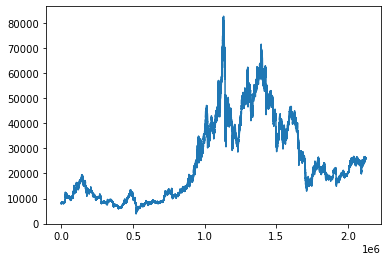

In [23]:
plt.plot(model_calibrated.predict())


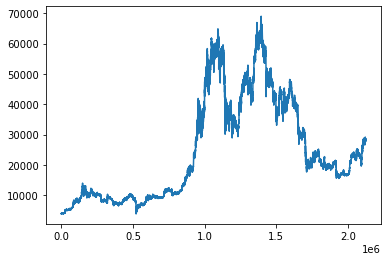

In [25]:
plt.plot(reg_df['close_BTCUSDT'].values)

In [26]:
spread = reg_df['close_BTCUSDT'] - model_calibrated.predict()

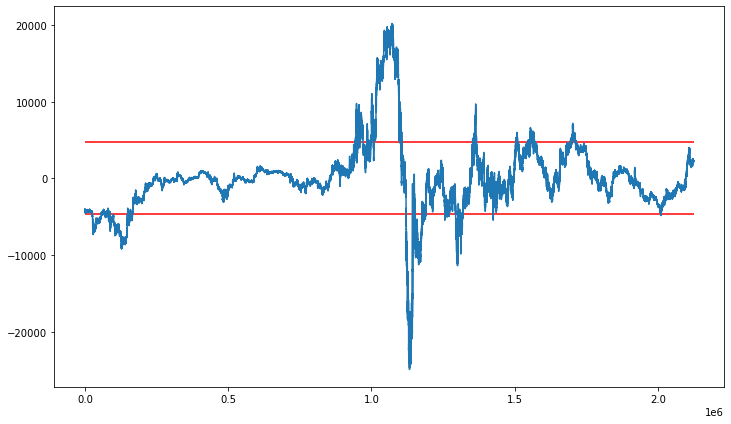

In [35]:
plt.figure(figsize = (12,7))
plt.plot(spread.values)
plt.hlines(np.std(spread),xmin = 0,xmax = len(spread),color = 'r')
plt.hlines(-np.std(spread),xmin = 0,xmax = len(spread),color = 'r')

In [36]:
np.std(spread)

4695.037431011142

In [30]:
np.mean(spread)

-80.68251639579853